In [40]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=Admisiones_DWH;'
                      'Trusted_Connection=yes;')

# cursor = conn.cursor()
# cursor.execute('SELECT e.*, c.NombreFacultad FROM Fact.Examen E INNER JOIN Dimension.Carrera C on (E.SK_Carrera = C.SK_Carrera)')

# df = pd.DataFrame(cursor,columns=['SK_Examen', 'SK_Candidato', 'SK_Carrera', 'SK_Materia', 'SK_Descuento', 'DateKey', 'Precio', 'NotaTotal','NombreFacultad'])
df= pd.io.sql.read_sql('SELECT e.*, c.NombreFacultad FROM Fact.Examen E INNER JOIN Dimension.Carrera C on (E.SK_Carrera = C.SK_Carrera)', conn)
Query1 = df.groupby('NombreFacultad').count()
Query1

,SK_Examen,SK_Candidato,SK_Carrera,SK_Materia,SK_Descuento,DateKey,Precio,NotaTotal
NombreFacultad,,,,,,,,
Arquitectura,195,195,195,195,195,195,195,195
Ciencias Agricolas,73,73,73,73,73,73,73,73
Ciencias Economicas,193,193,193,193,193,193,193,193
Ciencias Politicas,224,224,224,224,224,224,224,224
Ingeniería,293,293,293,293,293,293,293,293
Medicina,220,220,220,220,220,220,220,220


## Un conteo de la cantidad de candidatos agrupados por genero

In [1]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=Admisiones_DWH;'
                      'Trusted_Connection=yes;')

df= pd.io.sql.read_sql('''
                          select DC.ID_Candidato, DC.Genero
                          from Dimension.Candidato DC
                          ''', conn)
Query2=df.groupby('Genero').count()
Query2

## Un total de la cantidad de ingresos por evaluaciones (columna precio) que se ha recibido agrupado por carrera

In [30]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=Admisiones_DWH;'
                      'Trusted_Connection=yes;')
df= pd.io.sql.read_sql('''
SELECT E.Precio,DC.NombreCarrera 
FROM Fact.Examen E INNER JOIN Dimension.Carrera DC ON (E.SK_Carrera = DC.SK_Carrera)
                          ''', conn)
Query3=df.groupby('NombreCarrera').sum()
Query3

,Precio
NombreCarrera,
Admin de Empresas,36377.31
Agronomia,34478.49
Arquitecrtura,29847.88
Ciencias sociales,32408.48
Contador Publico y Auditor,30255.80
Derecho internacional,39794.58
Diseño Industrial,28023.16
Diseño grafico,34442.38
Enfermeria,33767.07


## Un data frame filtrado que contenga únicamente las tres facultades con el promedio de la nota mas alto

In [57]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=Admisiones_DWH;'
                      'Trusted_Connection=yes;')
df= pd.io.sql.read_sql('''
SELECT DC.NombreFacultad, E.NotaTotal
FROM Dimension.Carrera DC INNER JOIN
Fact.Examen E ON (DC.SK_Carrera = E.SK_Carrera)
                          ''', conn)
Agrupado = df.groupby('NombreFacultad').mean('NotaTotal')
Agrupado.nlargest(3,'NotaTotal')

,NotaTotal
NombreFacultad,
Ciencias Politicas,77.192634
Medicina,76.603636
Ingeniería,76.548532


# Utilice las librerías para plot (graficas) y cree las siguientes graficas

## Un grafico de pie con la cantidad de exámenes agrupados por facultad

<AxesSubplot:ylabel='SK_Examen'>

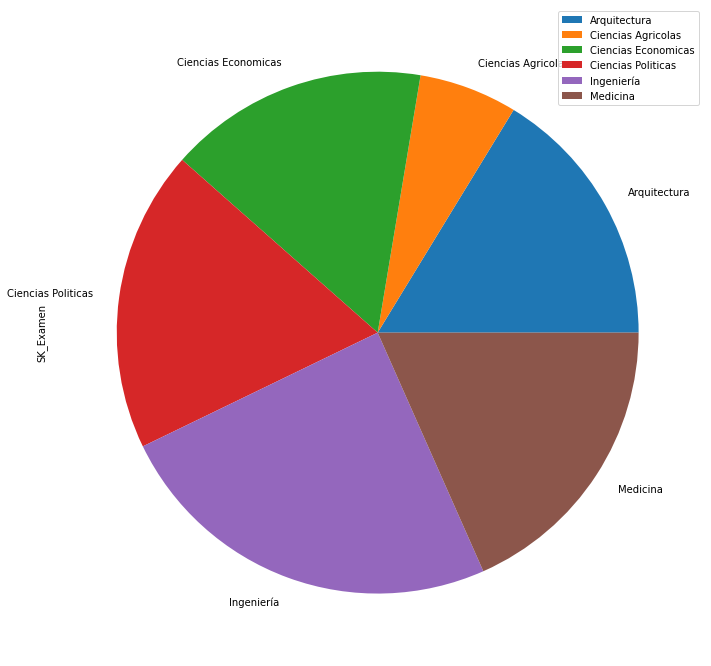

In [50]:
import matplotlib as mpl
Query1.plot.pie(y='SK_Examen',figsize=(24,12))

## Un grafico de barras con el promedio de la nota agrupado por carrera

<AxesSubplot:xlabel='NombreCarrera'>

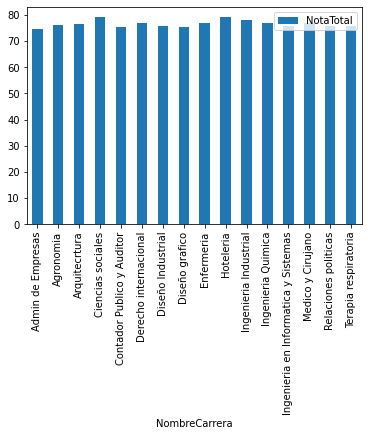

In [56]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=Admisiones_DWH;'
                      'Trusted_Connection=yes;')
df= pd.io.sql.read_sql('''
SELECT E.NotaTotal, C.NombreCarrera
FROM Fact.Examen E INNER JOIN 
Dimension.Carrera C ON (E.SK_Carrera = C.SK_Carrera)
                          ''', conn)
Agrupado2 = df.groupby('NombreCarrera').mean('NotaTotal')
Agrupado.plot(kind = 'bar')

## Un grafico de línea con la cantidad de exámenes por año

<AxesSubplot:xlabel='Year'>

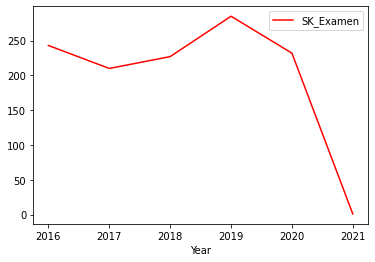

In [66]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=Admisiones_DWH;'
                      'Trusted_Connection=yes;')
df= pd.io.sql.read_sql('''
SELECT E.SK_Examen, F.Year FROM Fact.Examen E INNER JOIN Dimension.Fecha F ON (E.DateKey = F.DateKey)
                          ''', conn)
ExamenesPorAnio = df.groupby('Year').count()
ExamenesPorAnio.plot.line(color={"SK_Examen": "red"})